<a href="https://colab.research.google.com/github/theeps/-RTMS_Webdevelopers/blob/main/Sentimental_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the training dataset


In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/FinalDatasetmerged11.csv',encoding=('utf8'))
data.head()

,content,sentiment_labels
0,good shopping app,2.0
1,love fast easy use,2.0
2,awesome,2.0
3,easy use,2.0
4,Feels wonderful shopping here,2.0


In [3]:
data.shape


(34053, 2)

In [4]:
data['sentiment_labels'].value_counts()

 2.0    18995
-1.0    10007
 1.0     5047
Name: sentiment_labels, dtype: int64

In [5]:
data.isnull().sum()

content             6
sentiment_labels    4
dtype: int64

In [6]:
data = data.dropna()
print(data)

                             content  sentiment_labels
0                  good shopping app               2.0
1                 love fast easy use               2.0
2                            awesome               2.0
3                           easy use               2.0
4      Feels wonderful shopping here               2.0
...                              ...               ...
34048                           nice               1.0
34049                      good game               2.0
34050                    awesome app               2.0
34051                       greatest               2.0
34052                           nice               1.0

[34043 rows x 2 columns]


In [7]:
data.shape

(34043, 2)

##Removing the punctuations


In [8]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['content']= data['content'].apply(lambda x:remove_punctuation(x))
data.head()


,content,sentiment_labels
0,good shopping app,2.0
1,love fast easy use,2.0
2,awesome,2.0
3,easy use,2.0
4,Feels wonderful shopping here,2.0


##Lowering the content

In [9]:
data['content']= data['content'].apply(lambda x: x.lower())
data.head()

,content,sentiment_labels
0,good shopping app,2.0
1,love fast easy use,2.0
2,awesome,2.0
3,easy use,2.0
4,feels wonderful shopping here,2.0


##Tokenization

In [10]:
# #defining function for tokenization
import nltk
nltk.download('punkt')
data["content"] = data["content"].apply(nltk.word_tokenize)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,sentiment_labels
0,"[good, shopping, app]",2.0
1,"[love, fast, easy, use]",2.0
2,[awesome],2.0
3,"[easy, use]",2.0
4,"[feels, wonderful, shopping, here]",2.0


In [11]:
token_count= data['content'].str.len()
token_count


0        3
1        4
2        1
3        2
4        4
        ..
34048    1
34049    2
34050    2
34051    1
34052    1
Name: content, Length: 34043, dtype: int64

##Stop words Removal

In [12]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
data['content']= data['content'].apply(lambda x:remove_stopwords(x))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,sentiment_labels
0,"[good, shopping, app]",2.0
1,"[love, fast, easy, use]",2.0
2,[awesome],2.0
3,"[easy, use]",2.0
4,"[feels, wonderful, shopping]",2.0


##Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
data['content']=data['content'].apply(lambda x:lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content,sentiment_labels
0,"[good, shopping, app]",2.0
1,"[love, fast, easy, use]",2.0
2,[awesome],2.0
3,"[easy, use]",2.0
4,"[feel, wonderful, shopping]",2.0


Unlist

In [14]:
data['content'] = data['content'].apply(lambda x: " ".join(x))

In [15]:
data

,content,sentiment_labels
0,good shopping app,2.0
1,love fast easy use,2.0
2,awesome,2.0
3,easy use,2.0
4,feel wonderful shopping,2.0
...,...,...
34048,nice,1.0
34049,good game,2.0
34050,awesome app,2.0
34051,greatest,2.0


##Converting the sentiments to 0,1,2

In [16]:
# # convert Sentiments to 0,1,2
# def convert_sentiment_labels(sentiment):
#     if  sentiment == 'POSITIVE':
#         return 2
#     elif sentiment == 'NEUTRAL':
#         return 1
#     elif sentiment == 'NEGATIVE':
#         return 0

In [17]:
# # Apply convert_Sentiment function
# data['sentiment_labels']= data.sentiment_labels.apply(lambda x : convert_sentiment_labels(x))

##Defining the X and y variable

In [18]:
X= data['content']
y= data['sentiment_labels']

In [19]:
X

0              good shopping app
1             love fast easy use
2                        awesome
3                       easy use
4        feel wonderful shopping
                  ...           
34048                       nice
34049                  good game
34050                awesome app
34051                   greatest
34052                       nice
Name: content, Length: 34043, dtype: object

In [20]:
y

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
34048    1.0
34049    2.0
34050    2.0
34051    2.0
34052    1.0
Name: sentiment_labels, Length: 34043, dtype: float64

##Representing Text in Numeric Form(Vectorization)

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer ()
X = vectorizer.fit_transform(X).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
34048    1.0
34049    2.0
34050    2.0
34051    2.0
34052    1.0
Name: sentiment_labels, Length: 34043, dtype: float64

Dividing Data into Training and Test Sets

In [24]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

In [25]:
# X_train
# X_test
# y_train
# y_test

In [26]:
X_train.shape

(27234, 14134)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27234, 14134), (6809, 14134), (27234,), (6809,))

In [28]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##Training and evaluvating the ML Models 

In [29]:
# from sklearn.svm import LinearSVC
# classifier = LinearSVC()
# classifier.fit(X_train, y_train)

# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=5)
# classifier.fit(X_train, y_train)


# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB()
# classifier.fit(X_train, y_train)


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
print('Train Accuracy:',classifier.score(X_train,y_train))

Train Accuracy: 0.9463905412352207


In [31]:
from sklearn.metrics import accuracy_score
y_test_predicted = classifier.predict(X_test)
print('Test accuracy:',accuracy_score(y_test,y_test_predicted))



Test accuracy: 0.9280364223821412


In [32]:
# Models                                              #Training Accuracy                              #Testing Accuracy

# Linearsvc=                                            0.968189233278956                             0.9201491377971105
# KNeighborsClassifier=                                 0.9082964343975763                            0.862202889544819
# MultinomialNB=                                        0.9120640099432922                            0.8980891719745223
# logistic_regression=                                  0.9457003029596831                            0.9257418051887525  


In [33]:
#AFTER

# Models                                              #Training Accuracy                              #Testing Accuracy

# Linearsvc=                                            0.9689358889623265                            0.9230430312821266
# KNeighborsClassifier=                                 0.9094147022104722                            0.8741371713908063
# MultinomialNB=                                        0.9130865829477859                            0.8980760757820532
# logistic_regression=                                  0.9463905412352207                            0.9280364223821412  


##Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_predicted)
print(cm) 

[[1960    5   91]
 [  80  781  162]
 [  96   56 3578]]


[Text(0, 0.5, 'NEGATIVE'), Text(0, 1.5, 'NEUTRAL'), Text(0, 2.5, 'POSITIVE')]

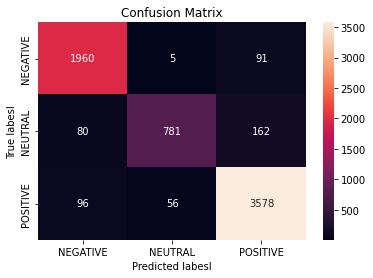

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.subplot()
sns.heatmap(cm,annot=True, fmt='g',ax=ax)
ax.set_xlabel('Predicted labesl')
ax.set_ylabel('True labesl')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NEGATIVE','NEUTRAL', 'POSITIVE'])
ax.yaxis.set_ticklabels(['NEGATIVE','NEUTRAL', 'POSITIVE'])

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

        -1.0       0.92      0.95      0.94      2056
         1.0       0.93      0.76      0.84      1023
         2.0       0.93      0.96      0.95      3730

    accuracy                           0.93      6809
   macro avg       0.93      0.89      0.91      6809
weighted avg       0.93      0.93      0.93      6809



##Prediction

In [37]:
google=pd.read_csv('/content/Google export-15714-all-full.csv',encoding=('utf8'))
google.head()

,Source,Date,Title,content,Name,Rating,Version
0,NZ COVID Tracer,1/10/2022,NaN,Waste of time,Michele Walker,1,NaN
1,NZ COVID Tracer,1/10/2022,NaN,Won't let me update or scan most QR codes,Allan Campbell,1,6.0.0
2,NZ COVID Tracer,1/10/2022,NaN,Does what is expected.,Vaughn Coghlan,5,6.1.0
3,NZ COVID Tracer,1/10/2022,NaN,App is super helpful and anyone that says othe...,Henry Clark,5,NaN
4,NZ COVID Tracer,1/10/2022,NaN,It's ok. The only thing I find annoying is it ...,Bex Watson,4,6.1.0


In [38]:
ios=pd.read_csv('/content/iOS export-15715-all-full.csv',encoding=('utf8'))

ios.head()

,Source,Date,Title,content,Name,Rating,Version
0,NZ COVID Tracer,1/9/2022,Doesn’t work after the latest update,The app Doesn’t work after the latest update!!...,Siddhartha vinchurkar,3,6.1.0
1,NZ COVID Tracer,1/9/2022,Invasive,That’s it,PreviousScan,1,6.1.0
2,NZ COVID Tracer,1/7/2022,Over the mandates…,Cindy said we’d be free after reaching 90% vac...,NZforTrump,1,6.1.0
3,NZ COVID Tracer,1/6/2022,Easy to use,Easy to use,Fellow Downloader,5,6.1.0
4,NZ COVID Tracer,12/22/2021,Government overreach,Government over reach,truthlovehate,1,6.1.0


In [39]:
playstore=google.drop(labels=['Source','Title','Name'], axis=1)
playstore


,Date,content,Rating,Version
0,1/10/2022,Waste of time,1,NaN
1,1/10/2022,Won't let me update or scan most QR codes,1,6.0.0
2,1/10/2022,Does what is expected.,5,6.1.0
3,1/10/2022,App is super helpful and anyone that says othe...,5,NaN
4,1/10/2022,It's ok. The only thing I find annoying is it ...,4,6.1.0
...,...,...,...,...
3581,7/24/2020,Downloaded without issue and scans fine on a r...,4,1.1.2
3582,7/24/2020,Tried it in three locations didn't work in any...,1,1.1.2
3583,7/23/2020,"Totally unnecessarily, if you want to know whe...",1,1.1.2
3584,7/23/2020,Why not send the sign in code as a notificatio...,2,1.1.2


In [40]:
playstore.shape

(3586, 4)

In [41]:
appstore = ios.drop(labels=['Source','Title','Name'], axis=1)
appstore

,Date,content,Rating,Version
0,1/9/2022,The app Doesn’t work after the latest update!!...,3,6.1.0
1,1/9/2022,That’s it,1,6.1.0
2,1/7/2022,Cindy said we’d be free after reaching 90% vac...,1,6.1.0
3,1/6/2022,Easy to use,5,6.1.0
4,12/22/2021,Government over reach,1,6.1.0
...,...,...,...,...
553,7/21/2020,This app is excellent and very easy to use. I ...,5,1.1.0
554,7/20/2020,Be great if I could go and add a location if I...,4,1.1.0
555,7/16/2020,My App is a bit shonky no longer allows me to ...,1,1.1.0
556,7/15/2020,I don’t know how many times I’ve tried to scan...,1,1.1.0


In [42]:
appstore.shape

(558, 4)

In [43]:
# df1=pd.DataFrame(appstore,index=[0,1,2])
# df2=pd.DataFrame(playstore,index=[3,4,5])
# df = [df1, df2]

df=pd.concat([appstore,playstore])
df

,Date,content,Rating,Version
0,1/9/2022,The app Doesn’t work after the latest update!!...,3,6.1.0
1,1/9/2022,That’s it,1,6.1.0
2,1/7/2022,Cindy said we’d be free after reaching 90% vac...,1,6.1.0
3,1/6/2022,Easy to use,5,6.1.0
4,12/22/2021,Government over reach,1,6.1.0
...,...,...,...,...
3581,7/24/2020,Downloaded without issue and scans fine on a r...,4,1.1.2
3582,7/24/2020,Tried it in three locations didn't work in any...,1,1.1.2
3583,7/23/2020,"Totally unnecessarily, if you want to know whe...",1,1.1.2
3584,7/23/2020,Why not send the sign in code as a notificatio...,2,1.1.2


##Removing the punctuations

In [44]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['content']= df['content'].apply(lambda x:remove_punctuation(x))
df.head()


,Date,content,Rating,Version
0,1/9/2022,The app Doesn’t work after the latest update \...,3,6.1.0
1,1/9/2022,That’s it,1,6.1.0
2,1/7/2022,Cindy said we’d be free after reaching 90 vacc...,1,6.1.0
3,1/6/2022,Easy to use,5,6.1.0
4,12/22/2021,Government over reach,1,6.1.0


##Lowering the content

In [45]:
df['content']= df['content'].apply(lambda x: x.lower())
df.head()

,Date,content,Rating,Version
0,1/9/2022,the app doesn’t work after the latest update \...,3,6.1.0
1,1/9/2022,that’s it,1,6.1.0
2,1/7/2022,cindy said we’d be free after reaching 90 vacc...,1,6.1.0
3,1/6/2022,easy to use,5,6.1.0
4,12/22/2021,government over reach,1,6.1.0


##Tokenization

In [46]:
# #defining function for tokenization
import nltk
df["content"] = df["content"].apply(nltk.word_tokenize)
df.head()


,Date,content,Rating,Version
0,1/9/2022,"[the, app, doesn, ’, t, work, after, the, late...",3,6.1.0
1,1/9/2022,"[that, ’, s, it]",1,6.1.0
2,1/7/2022,"[cindy, said, we, ’, d, be, free, after, reach...",1,6.1.0
3,1/6/2022,"[easy, to, use]",5,6.1.0
4,12/22/2021,"[government, over, reach]",1,6.1.0


In [47]:
token_count= df['content'].str.len()
token_count


0       12
1        4
2       23
3        3
4        3
        ..
3581    33
3582    17
3583    51
3584    22
3585    21
Name: content, Length: 4144, dtype: int64

##Stop words Removal

In [48]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['content']= df['content'].apply(lambda x:remove_stopwords(x))
df.head()

,Date,content,Rating,Version
0,1/9/2022,"[app, ’, work, latest, update, fix, urgently]",3,6.1.0
1,1/9/2022,[’],1,6.1.0
2,1/7/2022,"[cindy, said, ’, free, reaching, 90, vaccinate...",1,6.1.0
3,1/6/2022,"[easy, use]",5,6.1.0
4,12/22/2021,"[government, reach]",1,6.1.0


##Lemmatization

In [49]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['content']=df['content'].apply(lambda x:lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,content,Rating,Version
0,1/9/2022,"[app, ’, work, latest, update, fix, urgently]",3,6.1.0
1,1/9/2022,[’],1,6.1.0
2,1/7/2022,"[cindy, said, ’, free, reaching, 90, vaccinate...",1,6.1.0
3,1/6/2022,"[easy, use]",5,6.1.0
4,12/22/2021,"[government, reach]",1,6.1.0


Unlist

In [50]:
df['content'] = df['content'].apply(lambda x: " ".join(x))

##Added new column and Defined the X,y variable 

In [51]:
df["sentiment_labels"]=' '
X= df['content']
y= df['sentiment_labels']
df

,Date,content,Rating,Version,sentiment_labels
0,1/9/2022,app ’ work latest update fix urgently,3,6.1.0,
1,1/9/2022,’,1,6.1.0,
2,1/7/2022,cindy said ’ free reaching 90 vaccinated… ’ ta...,1,6.1.0,
3,1/6/2022,easy use,5,6.1.0,
4,12/22/2021,government reach,1,6.1.0,
...,...,...,...,...,...
3581,7/24/2020,downloaded without issue scan fine reasonably ...,4,1.1.2,
3582,7/24/2020,tried three location didnt work work test q r ...,1,1.1.2,
3583,7/23/2020,totally unnecessarily want know youve look goo...,1,1.1.2,
3584,7/23/2020,send sign code notification email wont accept ...,2,1.1.2,


In [52]:
X = vectorizer.transform(df['content']).toarray()

In [53]:
X.shape

(4144, 14134)

In [54]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
 new_output = classifier.predict(X)

In [56]:
new_output

array([-1.,  2.,  2., ...,  2., -1., -1.])

In [57]:
# new_output = np.array(new_output)
# new_output

In [58]:
df['sentiment_labels'] = new_output.tolist()
df

,Date,content,Rating,Version,sentiment_labels
0,1/9/2022,app ’ work latest update fix urgently,3,6.1.0,-1.0
1,1/9/2022,’,1,6.1.0,2.0
2,1/7/2022,cindy said ’ free reaching 90 vaccinated… ’ ta...,1,6.1.0,2.0
3,1/6/2022,easy use,5,6.1.0,2.0
4,12/22/2021,government reach,1,6.1.0,2.0
...,...,...,...,...,...
3581,7/24/2020,downloaded without issue scan fine reasonably ...,4,1.1.2,2.0
3582,7/24/2020,tried three location didnt work work test q r ...,1,1.1.2,-1.0
3583,7/23/2020,totally unnecessarily want know youve look goo...,1,1.1.2,2.0
3584,7/23/2020,send sign code notification email wont accept ...,2,1.1.2,-1.0


In [59]:
# convert 0,1,2 Sentiments to positive,neutral and negative
def convert_sentiment_labels(sentiment):
    if  sentiment == 2:
        return 'POSITIVE'
    elif sentiment == 1 :
        return 'NEUTRAL'
    elif sentiment == -1:
        return 'NEGATIVE'

# Apply convert_Sentiment function
df['sentiment_labels']= df.sentiment_labels.apply(lambda x : convert_sentiment_labels(x))

In [60]:
df['sentiment_labels'].value_counts()

NEGATIVE    2388
POSITIVE    1700
NEUTRAL       56
Name: sentiment_labels, dtype: int64

In [61]:
# convert ratings to positive, negative, neutral
def convert_Rating(Rating):
    if  Rating == 4 :    
        return 'POSITIVE'
    if  Rating == 5 :    
        return 'POSITIVE'
    elif Rating ==  3 :
        return 'NEUTRAL'
    elif Rating == 1 :
        return 'NEGATIVE'
    elif Rating == 2 :
        return 'NEGATIVE'

# Apply convert_Sentiment function
df['Rating_converted']= df.Rating.apply(lambda x : convert_Rating(x))

In [62]:
df

,Date,content,Rating,Version,sentiment_labels,Rating_converted
0,1/9/2022,app ’ work latest update fix urgently,3,6.1.0,NEGATIVE,NEUTRAL
1,1/9/2022,’,1,6.1.0,POSITIVE,NEGATIVE
2,1/7/2022,cindy said ’ free reaching 90 vaccinated… ’ ta...,1,6.1.0,POSITIVE,NEGATIVE
3,1/6/2022,easy use,5,6.1.0,POSITIVE,POSITIVE
4,12/22/2021,government reach,1,6.1.0,POSITIVE,NEGATIVE
...,...,...,...,...,...,...
3581,7/24/2020,downloaded without issue scan fine reasonably ...,4,1.1.2,POSITIVE,POSITIVE
3582,7/24/2020,tried three location didnt work work test q r ...,1,1.1.2,NEGATIVE,NEGATIVE
3583,7/23/2020,totally unnecessarily want know youve look goo...,1,1.1.2,POSITIVE,NEGATIVE
3584,7/23/2020,send sign code notification email wont accept ...,2,1.1.2,NEGATIVE,NEGATIVE


In [63]:
df['check'] = np.where(df["sentiment_labels"] == df["Rating_converted"], True, False)

In [64]:
df

,Date,content,Rating,Version,sentiment_labels,Rating_converted,check
0,1/9/2022,app ’ work latest update fix urgently,3,6.1.0,NEGATIVE,NEUTRAL,False
1,1/9/2022,’,1,6.1.0,POSITIVE,NEGATIVE,False
2,1/7/2022,cindy said ’ free reaching 90 vaccinated… ’ ta...,1,6.1.0,POSITIVE,NEGATIVE,False
3,1/6/2022,easy use,5,6.1.0,POSITIVE,POSITIVE,True
4,12/22/2021,government reach,1,6.1.0,POSITIVE,NEGATIVE,False
...,...,...,...,...,...,...,...
3581,7/24/2020,downloaded without issue scan fine reasonably ...,4,1.1.2,POSITIVE,POSITIVE,True
3582,7/24/2020,tried three location didnt work work test q r ...,1,1.1.2,NEGATIVE,NEGATIVE,True
3583,7/23/2020,totally unnecessarily want know youve look goo...,1,1.1.2,POSITIVE,NEGATIVE,False
3584,7/23/2020,send sign code notification email wont accept ...,2,1.1.2,NEGATIVE,NEGATIVE,True


In [65]:
df['check'].value_counts()

True     2930
False    1214
Name: check, dtype: int64

In [66]:
df['check'].value_counts(normalize=True) 

True     0.707046
False    0.292954
Name: check, dtype: float64

In [67]:
# convert Sentiments to 0,1,2
def convert_sentiment_labels(sentiment):
    if  sentiment == 'POSITIVE':
        return 2
    elif sentiment == 'NEUTRAL':
        return 1
    elif sentiment == 'NEGATIVE':
        return 0
# Apply convert_Sentiment function
df['sentiments']= df.sentiment_labels.apply(lambda x : convert_sentiment_labels(x))

In [68]:
df['positive_sentiments'] = np.where(df["sentiment_labels"] == 'POSITIVE', 2,'')


In [69]:
df['negative_sentiments'] = np.where(df["sentiment_labels"] == 'NEGATIVE', 0,'')


In [70]:
df['neutral_sentiments'] = np.where(df["sentiment_labels"] == 'NEUTRAL', 1,'')
df

,Date,content,Rating,Version,sentiment_labels,Rating_converted,check,sentiments,positive_sentiments,negative_sentiments,neutral_sentiments
0,1/9/2022,app ’ work latest update fix urgently,3,6.1.0,NEGATIVE,NEUTRAL,False,0,,0,
1,1/9/2022,’,1,6.1.0,POSITIVE,NEGATIVE,False,2,2,,
2,1/7/2022,cindy said ’ free reaching 90 vaccinated… ’ ta...,1,6.1.0,POSITIVE,NEGATIVE,False,2,2,,
3,1/6/2022,easy use,5,6.1.0,POSITIVE,POSITIVE,True,2,2,,
4,12/22/2021,government reach,1,6.1.0,POSITIVE,NEGATIVE,False,2,2,,
...,...,...,...,...,...,...,...,...,...,...,...
3581,7/24/2020,downloaded without issue scan fine reasonably ...,4,1.1.2,POSITIVE,POSITIVE,True,2,2,,
3582,7/24/2020,tried three location didnt work work test q r ...,1,1.1.2,NEGATIVE,NEGATIVE,True,0,,0,
3583,7/23/2020,totally unnecessarily want know youve look goo...,1,1.1.2,POSITIVE,NEGATIVE,False,2,2,,
3584,7/23/2020,send sign code notification email wont accept ...,2,1.1.2,NEGATIVE,NEGATIVE,True,0,,0,


In [71]:
df.to_csv ('/content/predicted_NZ_Sentiments.csv')